# Exploratory Data Analysis 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
haberman=pd.read_csv('haberman.csv')
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [2]:
print(haberman.shape)

(306, 4)


In [3]:
print(haberman.columns)


Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

**observations:-** 225 patients survived more than 5 years as survival_status is 1 and 
           81 patients survived less than 5 years as survival_status is 2
           This dataset is imbalanced dataset as datapoints are different for both class

In [3]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


## Univariate analysis - PDF, CDF, Boxplot, Voilin plots


### Probability Density Function (PDF)

C:\Users\dipali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


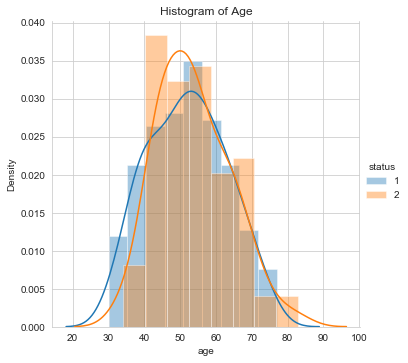

In [60]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=5) .map(sns.distplot, "age") .add_legend();
plt.ylabel('Density')
plt.title('Histogram of Age')
plt.show();



**Observation :- ** 
     1. Plot is overlapping so we can not conclude much on this but based on this we can say that survival of patient doesn't 
        depend on patients age.
     2. Age between 50-60 years has highest probability of surviving more than 5 years after surgery.
     3. Age between 45-55 years has highest probability of surviving less than 5 years after surgery.

C:\Users\dipali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


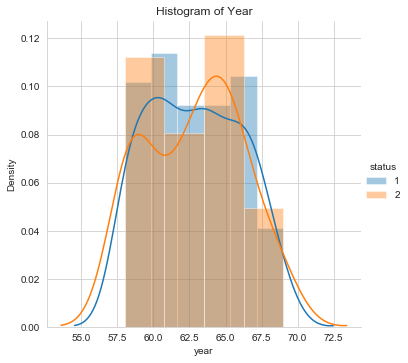

In [2]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=5) .map(sns.distplot, "year") .add_legend();
plt.ylabel('Density')
plt.title('Histogram of Year')
plt.show();

**Observation :-** 
     1. We can observe that plot is overlapping and operation_year can not be parameter to predict survival of patient.
     2. Operations done in year between 1958-1962 are more succesful as patients survived more than 5 years after surgery.
     3. Operations done in year between 1963-1966 are not succesful as patients survived less than 5 years after surgery.

C:\Users\dipali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


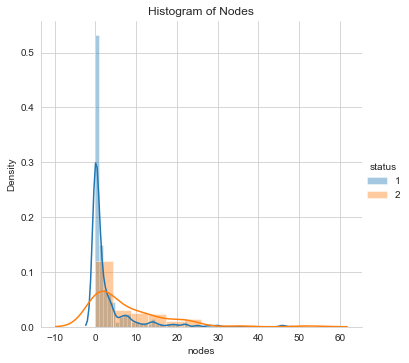

In [62]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=5) .map(sns.distplot, "nodes") .add_legend();
plt.ylabel('Density')
plt.title('Histogram of Nodes')
plt.show();

**Obseravtion :-** 
      1. By observing this plot we can say, nodes is important feature to predict survival status of patient.
      2. patient having 0 or slightly greater than 0 node survive more than 5 years after surgery.
      3. patient having node between 5-60 survive less than 5 years after surgery.
      4. There are very few patients with node<25

### Cumulative Distribution Function (CDF)

In [3]:
# seperating the dataframes on the basis of the status of survival
haberman_1 = haberman.loc[haberman["status"] == 1]
haberman_2 = haberman.loc[haberman["status"] == 2]

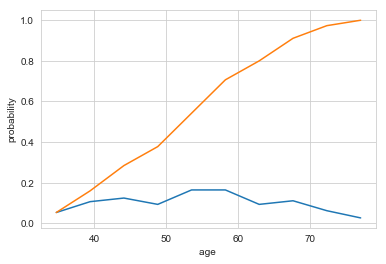

In [58]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(haberman_1["age"],bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("age ")
plt.ylabel("probability")
plt.show()

**Observation :-** 
      1. 72% of patients who are having age less than 60 years have survived more than 5 years after surgery
      2. We can see that maximum patients are in age range between 53-59 who survived more than 5 years after surgery.
      3. There are very few patients having age greater than 68 who survived more than 5 years after surgery.

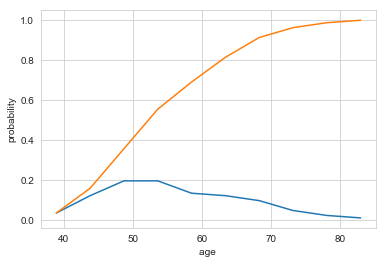

In [59]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(haberman_2["age"],bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("age ")
plt.ylabel("probability")
plt.show()

**Observation :- ** 
     1. There are approximately 5% of patients less than age 40 years have survived less than 5 years after surgery.
     2. There are 53% of patients who have age less than 56 years have survived less than 5 years after surgery.
     3. There are 1% of patients with age < 78 who survived less than 5 years after surgery.

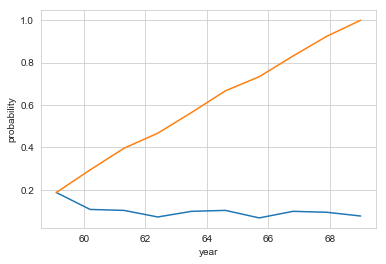

In [5]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(haberman_1["year"],bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("year")
plt.ylabel("probability")
plt.show()

**Observation :-** 
     1. There are 60% of patients who undergone surgery before year 1964 have survived more than 5 years.
     2. There is sudden drop in patients before year 1960.
     3. There are 20% of patients who undergone surgery in year 1966-1968 have survived more than 5 years.

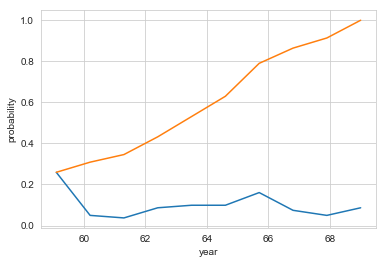

In [56]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(haberman_2["year"],bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("year")
plt.ylabel("probability")
plt.show()

**Observation :-** 
      1. There are 80% of patients who undergone surgery before year 1966 have survived less than 5 years.
      2. There are 40% of patients who undergone surgery before year 1962 have survived less than 5 years.
      3. There are 20% of patients who undergone surgery in year between 1965-1966 have highest probability of surviving less 
         than 5 years.

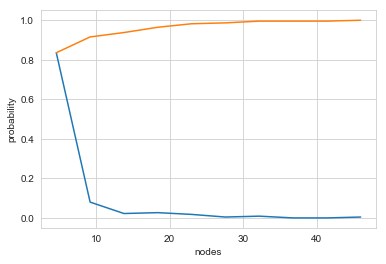

In [5]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(haberman_1["nodes"],bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.ylabel("probability")
plt.show()

**Observation :-**
     1. There are 82% of patients who have nodes less than 8 have survived more than 5 years after surgery.
     2. There are 99% of patients who have nodes less than 25 have survived more than 5 years after surgery.
     3. There are 1% of patients who have nodes < 30 have survived more than 5 years after surgery.

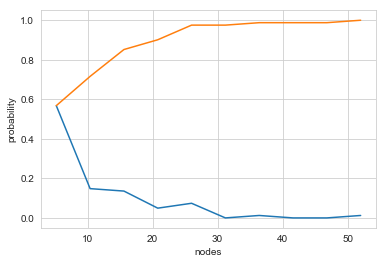

In [54]:
sns.set_style("whitegrid");
counts, bin_edges = np.histogram(haberman_2["nodes"],bins = 10,density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("nodes")
plt.ylabel("probability")
plt.show()

**Observation :-** 
     1. There are 70% of patients who have node=10 have survived less than 5 years after surgery.
     2. There are 98% of patients who have node<30 have survived less than 5 years after surgery.
     3. There are 1% of patients who have node<40 have survived less than 5 years after surgery.

### BOX-PLOTS

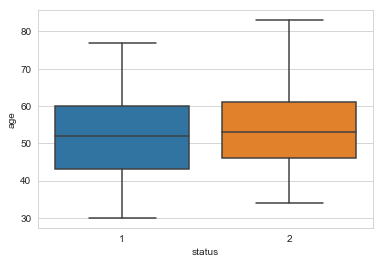

In [53]:
sns.set_style("whitegrid");
sns.boxplot(x ="status",y ="age",data = haberman)
plt.show()

**Observation :-** 
     1. There is a overlap of datapoints. 
     2. Average age of patient for both status 1 and 2 is almost same.
     3. There are less than 25% of patients who are having age between 30-43 years have survived more than 5 years after 
        surgery.
     4. The 75th percentile value is 60 for status=1 that means 25% of patients who are having age between 60-78 years 
        have survived more than 5 years after surgery.
     5. There are less than 25% of patients who are having age between 35-47 years have survived less than 5 years after 
        surgery.
     6. The 75th percentile value is 62 for status=2 that means 25% of patients who are having age between 62-85 years
        have survived less than 5 years after surgery. 

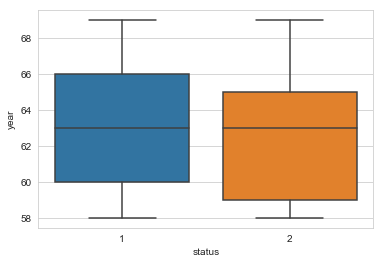

In [52]:
sns.set_style("whitegrid");
sns.boxplot(x = "status",y = "year",data = haberman)
plt.show()

**Observation :-** 
     1. There are less than 25% of patients who survived more than 5 years after surgery have undergone surgery before year 
        1969.
     2. The 75th percentile value for status=1 is 66 that means 25% of patients who undergone surgery in year range 1966-1970
        have survived more than 5 years after surgery.
     3. There are less than 25% of patients who survived less than 5 years after surgery have undergone surgery in year
        between 1958-1959.
     4. The 75th percentile value for status=2 is 65 that means 25% of patients who undergone surgery in year range 1965-1970 
        have survived less than 5 years after surgery.

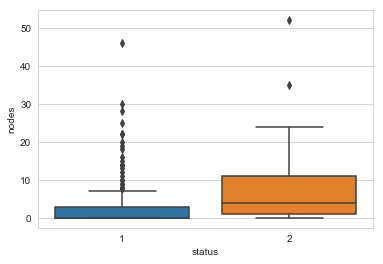

In [51]:
sns.set_style("whitegrid");
sns.boxplot(x ="status",y ="nodes",data = haberman)
plt.show()

**Observation :-** 
     1. By looking at the box-plot of status=1 we conclude that tere are more number of outliers in nodes of patient who
        suvived more than 5 years after surgery
     2. There are 25% of patients who survived more than 5 years after surgery have node in range 0-4.
     3. For status=2 we can say 75% of patients have node<=12 who survied less than 5 years after surgery.
     . 

### Voilin Plots

C:\Users\dipali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


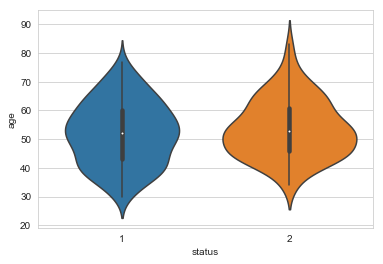

In [50]:
sns.set_style("whitegrid");
sns.violinplot(x ="status",y = "age",data = haberman,size =8)
plt.show()

C:\Users\dipali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


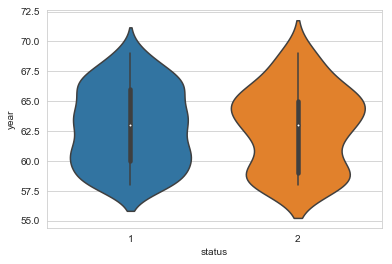

In [49]:
sns.set_style("whitegrid");
sns.violinplot(x = "status",y = "year",data = haberman,size =8)
plt.show()

C:\Users\dipali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


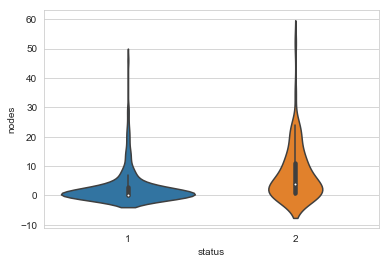

In [48]:
sns.set_style("whitegrid");
sns.violinplot(x = "status",y = "nodes",data = haberman,size =8)
plt.show()

**Observation :-** We get the same conclusion with voilin plot what we had got for box-plot.

## Bivariate analysis -  2D Scatter plots and Pair plots


### 2D Scatter Plots

C:\Users\dipali\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


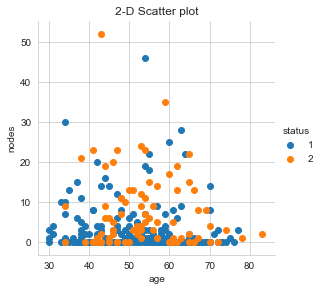

In [6]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) .map(plt.scatter, "age", "nodes") .add_legend();
plt.title('2-D Scatter plot')
plt.show();

**Observation :-** 
     1. Patients having node=0 or slightly greater than 0 have survied more than 5 years irrespective of thier age.
     2. There are very few patients with node<20

C:\Users\dipali\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


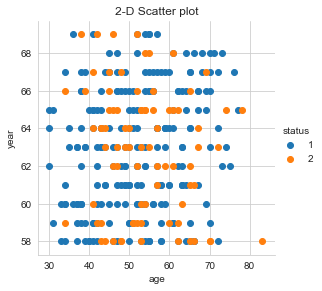

In [4]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) .map(plt.scatter, "age", "year") .add_legend();
plt.title('2-D Scatter plot')
plt.show();

**Observation :-** 
      From the plot we can say that age and year features together are not useful for making any conclusion as datapoints are jumbeled.

### Pair Plots

C:\Users\dipali\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


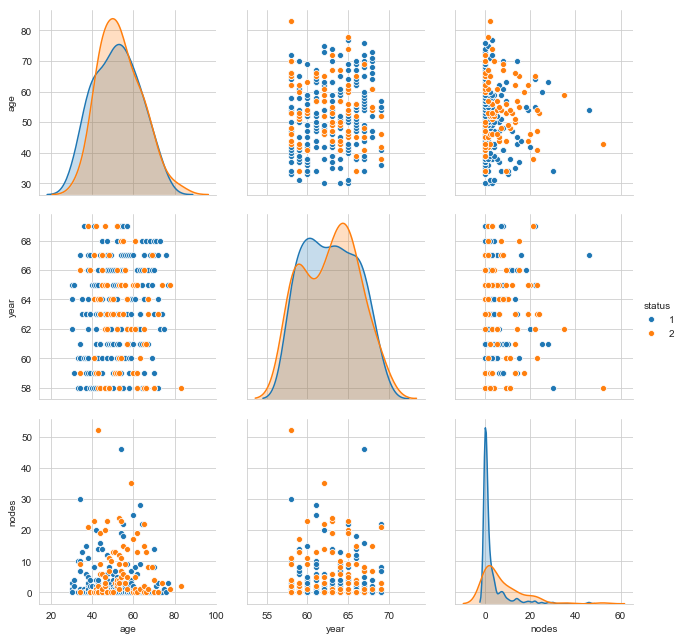

In [6]:
sns.set_style('whitegrid')  #Referance-https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(haberman,x_vars=["age", "year", "nodes"],y_vars=["age", "year","nodes"],hue="status",height=3);
plt.show();

**Observation :-**
     1. By looking at the all plots we can say that datapoints are not well seperated in any of the plot.
     2. We can not draw line and use simple model like if-else conditions for prediction.

## **Statistical Analysis**

In [14]:
print ("\nMean")
print(np.mean(haberman_1["age"]))
print(np.mean(haberman_2["age"]))
print(np.mean(haberman_1["nodes"]))
print(np.mean(haberman_2["nodes"]))


Mean
52.01777777777778
53.67901234567901
2.7911111111111113
7.45679012345679


In [15]:
print ("\nMedian")
print(np.median(haberman_1["age"]))
print(np.median(haberman_2["age"]))
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))


Median
52.0
53.0
0.0
4.0


In [16]:
print ("\nStanderd deviation")
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))


Standerd deviation
10.98765547510051
10.10418219303131
5.857258449412131
9.128776076761632


In [17]:
print ("\n90th Percentile")
print(np.percentile(haberman_1["age"], 90))
print(np.percentile(haberman_2["age"], 90))
print(np.percentile(haberman_1["nodes"], 90))
print(np.percentile(haberman_2["nodes"], 90))


90th Percentile
67.0
67.0
8.0
20.0


In [18]:
print ("\nQuantiles")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))


Quantiles
[30. 43. 52. 60.]
[34. 46. 53. 61.]
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


## ** FINAL CONCLUSION :-** 
    
    

### **From PDF's and CDF's :-**

     1.The PDF of the Patient Age graph shows that there are very less number of patients above the age of 80.
     2. From PDF we can conclude that nodes plays crucial role for classifying datapoints.
     3. Patients having node less than 6 had higher chance of surviving more than 5 years after surgery.
     4. Operation year can not be a parameter for predicting survival status of future new datapoints. 

### **From Box-plot's and Voilin plot's :-**

       1. There are outliers in nodes of patient for the status=1.
       2. 50% of operations done before the year 1963.
       3. Patients have node<=12 have less chance of surviving more than 5 years after surgery.
 . 
         
        

### **From Scatter plot's and Pair plot :-**
         
        1. Patients having node=0 or slightly greater than 0 have survied more than 5 years irrespective of thier age.
        2. There are very few patients with node<20.
        3. From the plot we can say that age and year features together are not useful for making any conclusion.
        4. We can not use simple model as datapoints are not well seperated.
        
        

### **From Statistical Analysis :-**
        
        1. The avg of ages of peoples in the both cases are almost similar.
        2. The mean and median value of node is different that is patient with high nodes value fall in case 2 (status=2).
        3. 90% of patients who survived more than 5 years after surgery have nodes value<8 and who survived less than 5 years 
           have nodes value<20.
        